## NFL Historical Team Dashboard: Data Cleaning
Ghislain Ventre\
DS4002

In [2]:
#Import dependencies
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import nfl_data_py as nfl
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# import data
df = pd.read_csv("pre_cleaned_final_data.csv")

### Description of the Data
Data obtained from: https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023/data \

This Kaggle user obtained the data from https://www.pro-football-reference.com/ using BeautifulSoup4 (python) and a Selenium Web Driver to pull the html data from the website and load into a dataframe, which was then posted on Kaggle for external use.

This dataset was originally created by the Kaggle user due to an interest in analyzing how NFL offenses have evolved over the modern era.

I personally selected this data set due to my recent obsession with fantasy football. I felt it would be interesting to complete a deeper analysis into the NFL teams and their trends over the years in order to gain some insights that I could potentially apply to my own fantasy football team going forward.

### Data Dictionary 
| Column Name    | Abbreviation | Description |
| -------------- | ------------ | ----------- |
| Season Year      | year| The year of the respective season (2003-2023) |
| Team Name        | team| The name of the respective NFL team |
| Games Won        | wins| The total number of games won by a team in a given year|
| Games Lost       | losses| The total number of games lost by a team in a given year|
| Win/Loss Percentage      | win_loss_perc| The win/loss percentage of a team, calculated by dividing the number of wins by total games played |
| Points For      | points| The total number of points scored by a team in a given year |
| Points Against      | points_opp| The total number of points taken by a team in a given year (team scoring against them) |
| Point Differential     | points_diff| Calculated by subtracting points against from points for for a given team in a given year|
| Average Margin of Victory (or Defeat)     | mov| The average number of points a team either won or lost games by, calculated by dividing the point differential of a team for a given year by the number of games played in that year |
| Games Played     | g| The number of games played by a team in a given year |
| Offensive Yards Gained     | total_yards| The total number of offensive yards (yards gained when playing on offense) by a team in a given year |
| Offensive Plays Ran     | plays_offense| The total number of plays ran by a team's offense (Team snapping the ball) in a given year |
| Yards Per Play Offense     | yds_per_play_offense| The average number of yards a team's offense gained per play in a given year, calculated by dividing offensive yards gained by offensive plays ran |
| Team Turnovers Lost     | turnovers| The total number of times a team's offense/special team either fumbled and lost the ball or threw an interception to the opposing team's defense and did not regain possession in a given year, can also be calculated by adding the team fumbles lost and interceptions thrown columns for a given year |
| Team Fumbles Lost     | fumbles_lost| The total number of times a team's offense/special team fumbled and lost the ball to the opposing team's defense in a given year |
| First Downs Gained     | first_down| The total number of times a team's offense reached a first down in a given year, can also be calculated by adding the team passing first downs gained and rushing first downs columns for a given year|
| Passes Completed     | pass_cmp| The total number of pass completions by a team in a given year |
| Pass Attempts     | pass_att| The total number of pass attempts by a team in a given year |
| Passing Yards     | pass_yds| The total number of passing yards by a team in a given year |
| Passing Touchdowns     | pass_td| The total number of passing touchdowns scored by a team in a given year |
| Interceptions Thrown     | pass_int| The total number of times a team's offense/special team threw a pass interception and lost the ball to the opposing team's denfese in a given year |
| Net Yards Gained Per Pass Attempt     | pass_net_yds_per_att| The average number of passing yards gained by a team in a given year, calculated by dividing the number of passing yards by the number of pass attempts (both for that respective team in that respective year) |
| Passing First Downs Gained     | pass_fd| The total number of time a team's offense reached a first down by throwing a ball in a given year |
| Rushing Attempts     | rush_att| The total number of rush attempts by a team in a given year |
| Rushing Yards     | rush_yds| The total number of rushing yards by a team in a given year |
| Rushing Touchdowns     | rush_td| The total number of rushing touchdowns scored by a team in a given year |
| Rushing Yards Per Attempt     | rush_yds_per_att| Description of Variable 3 |
| Rushing First Downs     | rush_fd| The total number of time a team's offense reached a first by rushing a ball in a given year |
| Penalties Committed     | penalties| The total number of penalties commited by a team in a given year|
| Penalty Yards Committed     | penalties_yds| The total number of penalty yards obtained by a team in a given year as a result of penalties |
| First Downs by Penalty     | pen_fd| The total number of first downs gained by a team in a given year as a result of the opposing team committing a penalty |
| Percentage of Drives Ending in Score     | score_pct| The percentage of time a team would score points in a drive in a given year |
| Percentage of Drives Ending in Turnover     | turnover_pct| The percentage of time a team would turn the ball over to the opposing team in a drive in a given year |
| Expected Points Contributed by Offense     | exp_pts_tot| The expected number of points contributed by a team's offense in a given year (still trying to fully understand this variable so it may or may not be included in my final dashboard) |
| Ties     | ties| The total number of games tied by a team in a given year |
| NFL Conference     | conference| The conference that each respective team is a part of, categorical variable with no hierarchy|
| NFL Division     | division| The division within a conference that each respective team is a part of, categorical variable with no hierarchy |

### Data Cleaning

In [3]:
# Transposed to see all of the relevant columns (rows in the table below)
df.head().T

,0,1,2,3,4
year,2003,2003,2003,2003,2003
team,New England Patriots,Miami Dolphins,Buffalo Bills,New York Jets,Baltimore Ravens
wins,14,10,6,6,10
losses,2,6,10,10,6
win_loss_perc,0.875,0.625,0.375,0.375,0.625
points,348,311,243,283,391
points_opp,238,261,279,299,281
points_diff,110,50,-36,-16,110
mov,6.9,3.1,-2.3,-1.0,6.9
g,16,16,16,16,16


In [4]:
# Multiply the 'win_loss_perc' column by 100 to match the percentage format of the 'score_pct' and
# 'turnover_pct' columns
df['win_loss_perc'] = df['win_loss_perc'] * 100

# Check to see the changes have been made to the column appropriately
df.head().T

,0,1,2,3,4
year,2003,2003,2003,2003,2003
team,New England Patriots,Miami Dolphins,Buffalo Bills,New York Jets,Baltimore Ravens
wins,14,10,6,6,10
losses,2,6,10,10,6
win_loss_perc,87.5,62.5,37.5,37.5,62.5
points,348,311,243,283,391
points_opp,238,261,279,299,281
points_diff,110,50,-36,-16,110
mov,6.9,3.1,-2.3,-1.0,6.9
g,16,16,16,16,16


In [5]:
# Check for missing values in the data set and sum across each column for total missing values per column
df.isnull().sum()

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64

In [6]:
# Check the different values in the 'ties' column before "cleaning" the missing values
df['ties'].value_counts()

ties
0.0    294
1.0     26
Name: count, dtype: int64

In [7]:
# Replace all NaN values in the 'ties' column with the value 0 - assume that a NaN value correlates to zero ties
# for a team in that given season
df['ties'].fillna(0, inplace=True)

# Check the sum of all missing values to ensure there aren't anymore in the 'ties' column
df.isnull().sum()

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                      0
dtype: int64

In [8]:
# Replace NaN values in the 'mov' column with a formula based on 'points_diff' divided by 'g'
# The assumption is that the margin of victory (mov) formula somehow didn't function properly, leading to the NaN
# values. The formula applies the 'points_diff'/'g' formula only if the value in the 'mov' column is NaN,
# otherwise it retains the existing 'mov' value

# documentation on the lambda function https://www.w3schools.com/python/python_lambda.asp
df['mov'] = df.apply(lambda row: row['points_diff'] / row['g'] if pd.isna(row['mov']) else row['mov'], axis=1)

# Check the sum of all missing values to ensure there aren't anymore in the 'mov' column
df.isnull().sum()

year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64

In [9]:
# Next I checked for any duplicates within the data set
df.duplicated().sum()


0

In [10]:
# Inspecting the different values in the 'team' column, we see examples of certain teams that don't have 21
# observations for each year in the data set (2003-2023). Upon further inspection (and prior knowledge) we 
# notice that these correlate to NFL teams that have either had their stadiums move to different cities
# or teams that have undergone name changes.
df['team'].value_counts()

team
New England Patriots        21
Seattle Seahawks            21
Tampa Bay Buccaneers        21
New Orleans Saints          21
Carolina Panthers           21
Detroit Lions               21
Chicago Bears               21
Minnesota Vikings           21
Green Bay Packers           21
New York Giants             21
Miami Dolphins              21
Dallas Cowboys              21
Philadelphia Eagles         21
San Francisco 49ers         21
Arizona Cardinals           21
Denver Broncos              21
Kansas City Chiefs          21
Houston Texans              21
Jacksonville Jaguars        21
Tennessee Titans            21
Indianapolis Colts          21
Cleveland Browns            21
Pittsburgh Steelers         21
Cincinnati Bengals          21
Baltimore Ravens            21
New York Jets               21
Buffalo Bills               21
Atlanta Falcons             21
Washington Redskins         17
Oakland Raiders             17
San Diego Chargers          14
St. Louis Rams              13
Los

In [11]:
# Rename teams that have had name changes to their most current team name
df['team'] = df['team'].replace({'Washington Football Team':'Washington Commanders',
                                 'Washington Redskins':'Washington Commanders',
                                 'Oakland Raiders':'Las Vegas Raiders',
                                 'San Diego Chargers':'Los Angeles Chargers',
                                 'St. Louis Rams':'Los Angeles Rams'})

# Check that all teams have observations for all 21 years in the dataset
df['team'].value_counts()

team
New England Patriots     21
Miami Dolphins           21
San Francisco 49ers      21
Seattle Seahawks         21
Los Angeles Rams         21
Atlanta Falcons          21
Tampa Bay Buccaneers     21
New Orleans Saints       21
Carolina Panthers        21
Detroit Lions            21
Chicago Bears            21
Minnesota Vikings        21
Green Bay Packers        21
New York Giants          21
Washington Commanders    21
Dallas Cowboys           21
Philadelphia Eagles      21
Los Angeles Chargers     21
Las Vegas Raiders        21
Denver Broncos           21
Kansas City Chiefs       21
Houston Texans           21
Jacksonville Jaguars     21
Tennessee Titans         21
Indianapolis Colts       21
Cleveland Browns         21
Pittsburgh Steelers      21
Cincinnati Bengals       21
Baltimore Ravens         21
New York Jets            21
Buffalo Bills            21
Arizona Cardinals        21
Name: count, dtype: int64

In [12]:
# Check the datatypes for the columns in the data set, mostly consisting of floats and integers, apart from the 
# 'team' column which is a string variable that represents the 32 teams in the NFL. Nothing seems to need to be
# cleaned from what I can tell
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   672 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [13]:
# Finally, to wrap up the Data Cleaning section, I wanted to add two columns to the data set to include
# The conference and division that each NFL team is from. This is not necessary for "tidy" data, but I 
# felt that it would be helpful later on when creating my dashboard.

# Create a dictionary to map each team to its conference and division (might remove the NFC and AFC from the
# division column later on)
team_conference_division = {
    'Arizona Cardinals': {'Team Abbr':'ARI','conference': 'NFC', 'division': 'NFC West'},
    'Atlanta Falcons': {'Team Abbr':'ATL','conference': 'NFC', 'division': 'NFC South'},
    'Baltimore Ravens': {'Team Abbr':'BAL','conference': 'AFC', 'division': 'AFC North'},
    'Buffalo Bills': {'Team Abbr':'BUF','conference': 'AFC', 'division': 'AFC East'},
    'Carolina Panthers': {'Team Abbr':'CAR','conference': 'NFC', 'division': 'NFC South'},
    'Chicago Bears': {'Team Abbr':'CHI','conference': 'NFC', 'division': 'NFC North'},
    'Cincinnati Bengals': {'Team Abbr':'CIN','conference': 'AFC', 'division': 'AFC North'},
    'Cleveland Browns': {'Team Abbr':'CLE','conference': 'AFC', 'division': 'AFC North'},
    'Dallas Cowboys': {'Team Abbr':'DAL','conference': 'NFC', 'division': 'NFC East'},
    'Denver Broncos': {'Team Abbr':'DEN','conference': 'AFC', 'division': 'AFC West'},
    'Detroit Lions': {'Team Abbr':'DET','conference': 'NFC', 'division': 'NFC North'},
    'Green Bay Packers': {'Team Abbr':'GB','conference': 'NFC', 'division': 'NFC North'},
    'Houston Texans': {'Team Abbr':'HOU','conference': 'AFC', 'division': 'AFC South'},
    'Indianapolis Colts': {'Team Abbr':'IND','conference': 'AFC', 'division': 'AFC South'},
    'Jacksonville Jaguars': {'Team Abbr':'JAX','conference': 'AFC', 'division': 'AFC South'},
    'Kansas City Chiefs': {'Team Abbr':'KC','conference': 'AFC', 'division': 'AFC West'},
    'Las Vegas Raiders': {'Team Abbr':'LV','conference': 'AFC', 'division': 'AFC West'},
    'Los Angeles Chargers': {'Team Abbr':'LAC','conference': 'AFC', 'division': 'AFC West'},
    'Los Angeles Rams': {'Team Abbr':'LA','conference': 'NFC', 'division': 'NFC West'},
    'Miami Dolphins': {'Team Abbr':'MIA','conference': 'AFC', 'division': 'AFC East'},
    'Minnesota Vikings': {'Team Abbr':'MIN','conference': 'NFC', 'division': 'NFC North'},
    'New England Patriots': {'Team Abbr':'NE','conference': 'AFC', 'division': 'AFC East'},
    'New Orleans Saints': {'Team Abbr':'NO','conference': 'NFC', 'division': 'NFC South'},
    'New York Giants': {'Team Abbr':'NYG','conference': 'NFC', 'division': 'NFC East'},
    'New York Jets': {'Team Abbr':'NYJ','conference': 'AFC', 'division': 'AFC East'},
    'Philadelphia Eagles': {'Team Abbr':'PHI','conference': 'NFC', 'division': 'NFC East'},
    'Pittsburgh Steelers': {'Team Abbr':'PIT','conference': 'AFC', 'division': 'AFC North'},
    'San Francisco 49ers': {'Team Abbr':'SF','conference': 'NFC', 'division': 'NFC West'},
    'Seattle Seahawks': {'Team Abbr':'SEA','conference': 'NFC', 'division': 'NFC West'},
    'Tampa Bay Buccaneers': {'Team Abbr':'TB','conference': 'NFC', 'division': 'NFC South'},
    'Tennessee Titans': {'Team Abbr':'TEN','conference': 'AFC', 'division': 'AFC South'},
    'Washington Commanders': {'Team Abbr':'WAS','conference': 'NFC', 'division': 'NFC East'}
}

# Create new columns for conference and division by mapping the respective team conference and divisions 
# based on the link team name provided in the above dictionary

# documentation on the lambda function https://www.w3schools.com/python/python_lambda.asp
df['conference'] = df['team'].map(lambda x: team_conference_division[x]['conference'])
df['division'] = df['team'].map(lambda x: team_conference_division[x]['division'])
df['Team Abbr'] = df['team'].map(lambda x: team_conference_division[x]['Team Abbr'])

# Check to make sure the two columns have been added appropriately
df.head().T

,0,1,2,3,4
year,2003,2003,2003,2003,2003
team,New England Patriots,Miami Dolphins,Buffalo Bills,New York Jets,Baltimore Ravens
wins,14,10,6,6,10
losses,2,6,10,10,6
win_loss_perc,87.5,62.5,37.5,37.5,62.5
points,348,311,243,283,391
points_opp,238,261,279,299,281
points_diff,110,50,-36,-16,110
mov,6.9,3.1,-2.3,-1.0,6.9
g,16,16,16,16,16


In [4]:
# Pull the team description 
logos = nfl.import_team_desc()

logos.head()

URLError: <urlopen error [WinError 10054] An existing connection was forcibly closed by the remote host>

In [3]:
# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn']]

NameError: name 'logos' is not defined

In [36]:
# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Create a folder for the image files if it doesn't exist

if not os.path.exists("logos"):
    os.makedirs("logos")

In [15]:
# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

NameError: name 'logos' is not defined

In [17]:
# Create a dictionary to put logo_paths and team_abbr in
data = {'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

logo_df.head()

NameError: name 'team_abbr' is not defined

In [16]:
# Join air yards/YAC DataFrame with the logo DataFrame
merged_df = pd.merge(df, logo_df)

merged_df

NameError: name 'logo_df' is not defined

In [41]:
merged_df.to_csv('data.csv')

### Data Exploration/Analysis

*Note that I used the transform function .T to see the output for all of the columns in some cases*

In [79]:
# untransformed look at the data frame

df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,conference,division
0,2003,New England Patriots,14,2,87.5,348,238,110,6.9,16,...,91,111,998,26,27.9,11.3,-136.51,0.0,AFC,AFC East
1,2003,Miami Dolphins,10,6,62.5,311,261,50,3.1,16,...,99,103,913,22,28.1,17.2,-177.92,0.0,AFC,AFC East
2,2003,Buffalo Bills,6,10,37.5,243,279,-36,-2.3,16,...,96,106,891,22,21.9,17.6,-230.07,0.0,AFC,AFC East
3,2003,New York Jets,6,10,37.5,283,299,-16,-1.0,16,...,78,69,550,15,32.4,11.8,-107.89,0.0,AFC,AFC East
4,2003,Baltimore Ravens,10,6,62.5,391,281,110,6.9,16,...,115,126,970,23,31.8,16.6,-220.50,0.0,AFC,AFC North


In [80]:
# The total number of elements in the data frame
df.size

24864

In [81]:
# Summary statistics for each of the numeric columns (mean, std, min, quartiles, max)
df.describe().T

# Some observations
# - number of games played increased at some point from 16 to 17 games a season - this should be considered
# when analyzing the data in the future

,count,mean,std,min,25%,50%,75%,max
year,672.0,2013.000000,6.059811,2003.00,2008.000,2013.000000,2018.000000,2023.00
wins,672.0,8.050595,3.093255,0.00,6.000,8.000000,10.000000,16.00
losses,672.0,8.050595,3.086020,0.00,6.000,8.000000,10.000000,16.00
win_loss_perc,672.0,50.024554,19.145175,0.00,37.500,50.000000,62.500000,100.00
points,672.0,358.633929,72.092050,168.00,305.000,359.000000,406.000000,606.00
points_opp,672.0,358.633929,57.889328,201.00,316.750,356.500000,398.000000,519.00
points_diff,672.0,0.000000,100.684601,-261.00,-75.000,-1.000000,75.250000,315.00
mov,672.0,0.000855,6.248569,-16.30,-4.625,-0.058824,4.630515,19.70
g,672.0,16.139881,0.347122,16.00,16.000,16.000000,16.000000,17.00
total_yards,672.0,5463.895833,628.209466,3587.00,5030.250,5467.500000,5900.250000,7474.00


In [82]:
# Different view looking at 5 random samples from the data set
df.sample(5).T

,183,643,137,496,580
year,2008,2023,2007,2018,2021
team,Detroit Lions,New England Patriots,Jacksonville Jaguars,Dallas Cowboys,Cincinnati Bengals
wins,0,4,11,10,10
losses,16,13,5,6,7
win_loss_perc,0.0,23.5,68.8,62.5,58.8
points,268,236,411,339,460
points_opp,517,366,304,324,376
points_diff,-249,-130,107,15,84
mov,-15.5625,-7.6,6.7,0.9375,4.941176
g,16,17,16,16,17


In [83]:
# Checking the number of unique values for each column
df.nunique()

year                     21
team                     32
wins                     17
losses                   17
win_loss_perc            42
points                  263
points_opp              227
points_diff             328
mov                     416
g                         2
total_yards             569
plays_offense           204
yds_per_play_offense     30
turnovers                38
fumbles_lost             22
first_down              161
pass_cmp                204
pass_att                241
pass_yds                578
pass_td                  42
pass_int                 29
pass_net_yds_per_att     45
pass_fd                 138
rush_att                210
rush_yds                516
rush_td                  30
rush_yds_per_att         25
rush_fd                  98
penalties                85
penalties_yds           382
pen_fd                   39
score_pct               244
turnover_pct            146
exp_pts_tot             666
ties                      2
conference          

In [84]:
# Useful function for looking at the largest observations (5 in this case) for a given column
# Only 1 team in this time range ever went undefeated in a season, the New England Patriots in 2007
df.nlargest(5,'wins')

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,conference,division
128,2007,New England Patriots,16,0,100.0,589,274,315,19.7,16,...,124,78,690,26,52.7,7.8,133.73,0.0,AFC,AFC East
36,2004,Pittsburgh Steelers,15,1,93.8,372,251,121,7.6,16,...,134,99,835,28,35.8,11.7,-95.61,0.0,AFC,AFC North
276,2011,Green Bay Packers,15,1,93.8,560,359,201,12.6,16,...,89,76,591,34,48.3,6.1,92.50,0.0,NFC,NFC North
408,2015,Carolina Panthers,15,1,93.8,500,308,192,12.0,16,...,136,103,887,24,42.9,9.6,115.28,0.0,NFC,NFC South
0,2003,New England Patriots,14,2,87.5,348,238,110,6.9,16,...,91,111,998,26,27.9,11.3,-136.51,0.0,AFC,AFC East


#### Graphical Exploration/Analysis

*Used graphical analysis inspiration from https://www.kaggle.com/code/eugeniokukes/nfl-team-data-2003-2023 who also did an analysis on this dataset*

<Axes: >

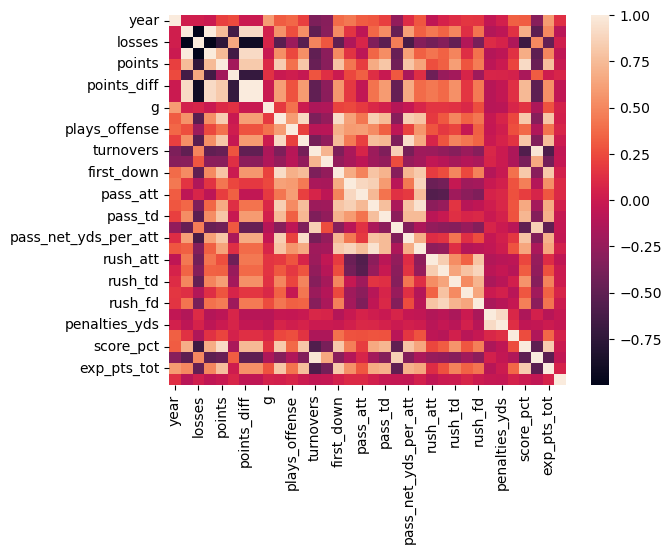

In [93]:
# A heatmap of correlation values for all the numerical variables in the dataset. 
# The first line filters out those numerical variables in the dataset.

numerical = df.select_dtypes(include=['float64', 'int64']).columns

sns.heatmap(df[numerical].corr())

# https://www.kaggle.com/code/eugeniokukes/nfl-team-data-2003-2023

In [87]:
# Still using the filtered dataset for numerical variables, this simply prints all the absolute values of
# the correlation values with the 'wins' column in the dataset, sorted from largest value to lowest

df[numerical].corrwith(df['wins']).abs().sort_values(ascending=False)

wins                    1.000000
win_loss_perc           0.997819
losses                  0.992109
mov                     0.909067
points_diff             0.908735
points                  0.753723
score_pct               0.685400
points_opp              0.641883
pass_net_yds_per_att    0.615580
total_yards             0.548353
yds_per_play_offense    0.533096
pass_td                 0.531350
first_down              0.523861
turnover_pct            0.514488
exp_pts_tot             0.507119
turnovers               0.499764
rush_td                 0.496516
pass_int                0.467626
rush_att                0.430656
rush_fd                 0.414979
pass_yds                0.364705
rush_yds                0.346847
pass_fd                 0.336447
fumbles_lost            0.303522
plays_offense           0.259240
pass_cmp                0.154554
pen_fd                  0.136843
rush_yds_per_att        0.122127
penalties               0.116042
ties                    0.088160
penalties_

Text(0.5, 1.0, "Heat Map of Teams' Win-Loss Percentage from 2003 to 2023")

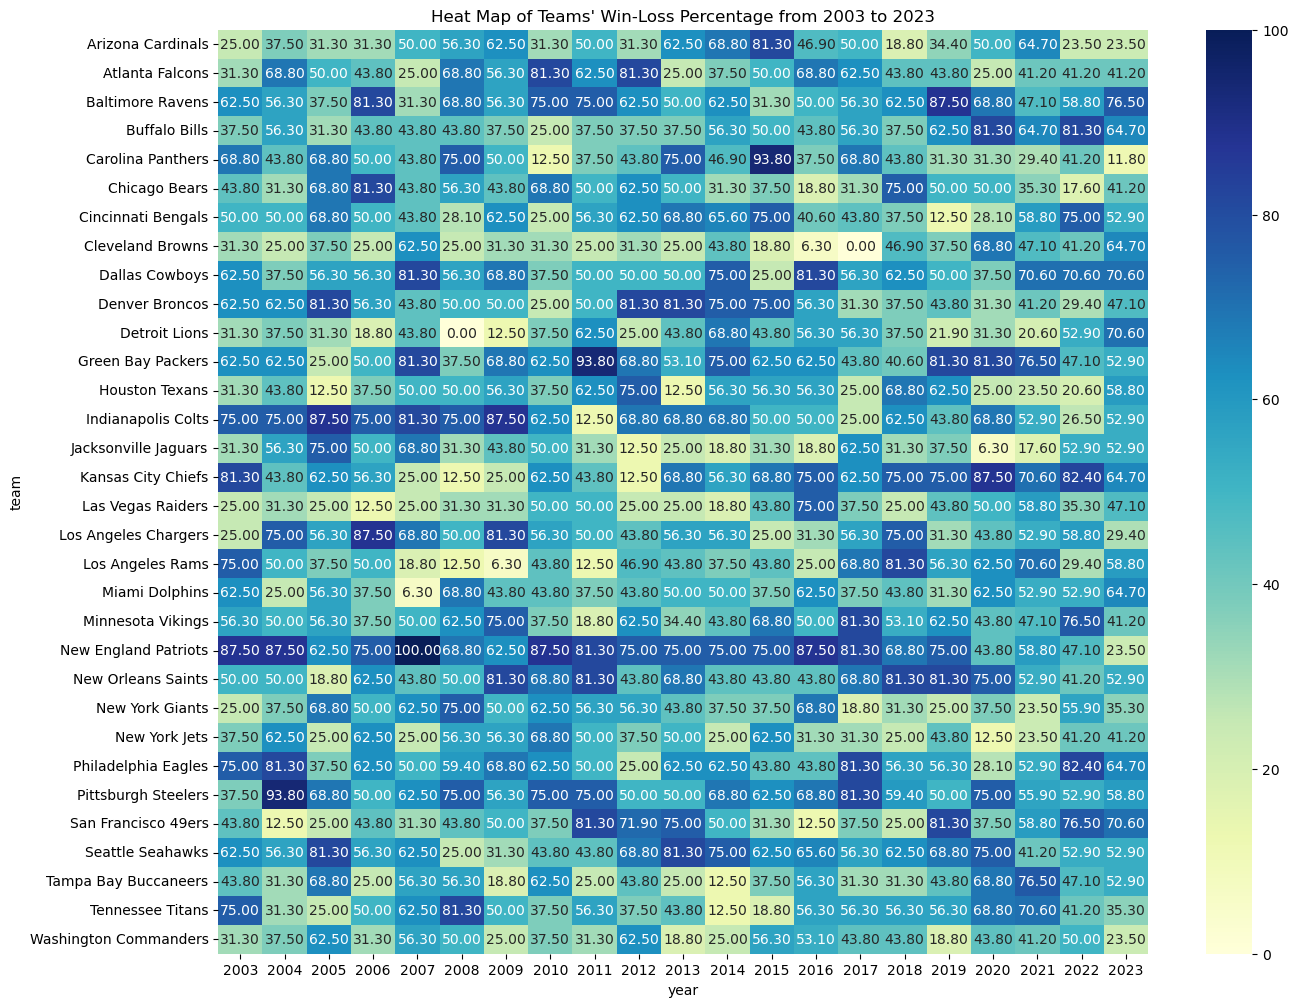

In [96]:
#resize the frame to fit all the win_loss_perc values
plt.figure(figsize=(15, 12))

# Creates another heatmap that shows all the NFL teams and their win/loss percentages for all the 
# years in the dataset
sns.heatmap(df.pivot_table(index="team", columns="year", values="win_loss_perc"), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heat Map of Teams' Win-Loss Percentage from 2003 to 2023")

In [97]:
# Select the top 5 teams based on win/loss percentage
top_teams = df.groupby('team')['win_loss_perc'].mean().nlargest(5).index.tolist()

# Filter the dataset to include only data for the top 5 teams
df_top_teams = df[df['team'].isin(top_teams)]

# build a line chart of the filtered dataset above
fig_line_color = px.line(df_top_teams, 
                      x = 'year', 
                      y = 'win_loss_perc',
                      color = 'team',
                      title = 'Win/Loss Percentage of Top 5 teams 2003-2023')
# display the chart
fig_line_color.show()

In [100]:
# Filter to just look at the most recent year - 2023
df_2023 = merged_df[merged_df['year'] == 2023]


# build a scatter plot that shows the rushing and passing yards for all NFL teams in the last year (2023)
# categorized by which conference they are in (AFC/NFC)
fig_scatter = px.scatter(df_2023,
                         x='pass_yds',
                         y='rush_yds',
                         color='conference',
                         hover_data=['team'],
                         title = 'Rushing and Passing Yards for all NFL teams in 2023')

# show
fig_scatter.show()

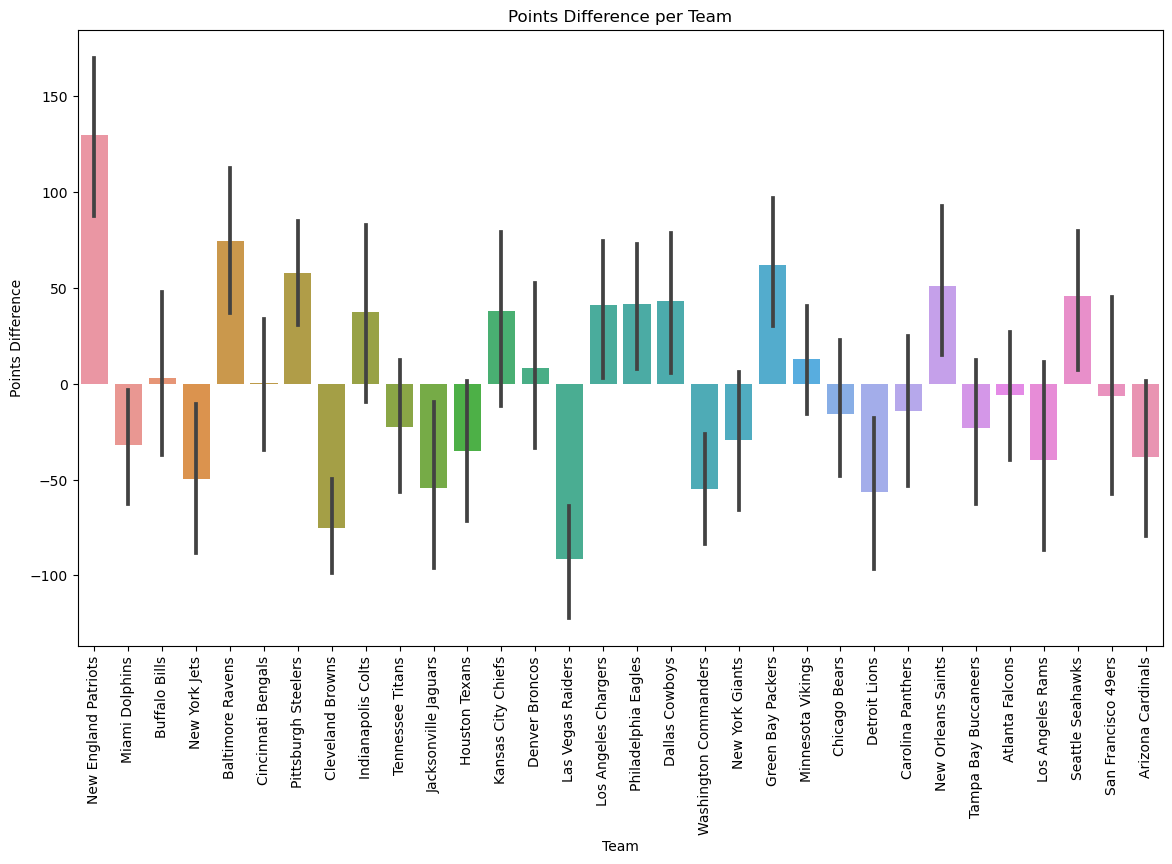

In [65]:
# Plotting points difference per team over the course of the dataset using a barplot
plt.figure(figsize=(14,8))
sns.barplot(x='team', y='points_diff', data=df)
plt.xticks(rotation=90)
plt.title('Points Difference per Team')
plt.xlabel('Team')
plt.ylabel('Points Difference')
plt.show()

# https://www.kaggle.com/code/eugeniokukes/nfl-team-data-2003-2023

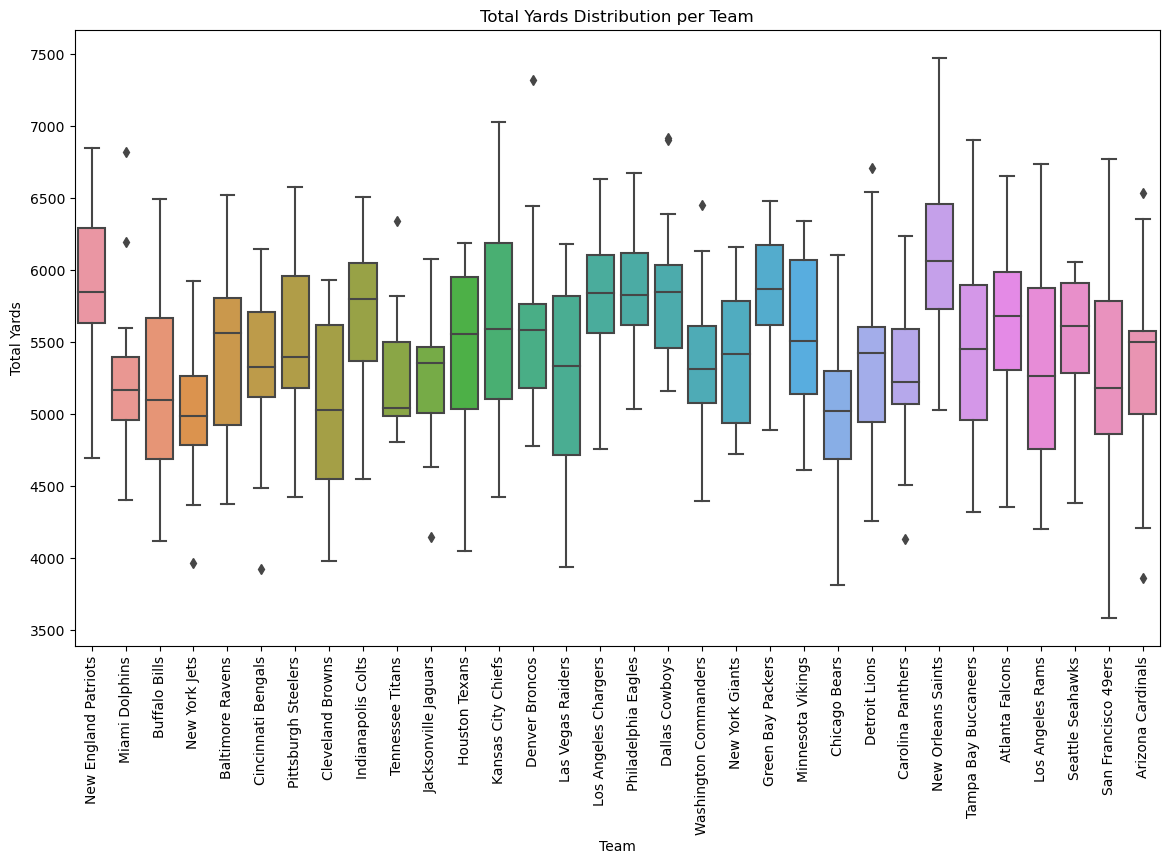

In [64]:
# Plotting total yards per team over the course of the dataset using a barplot
plt.figure(figsize=(14,8))
sns.boxplot(x='team', y='total_yards', data=df)
plt.xticks(rotation=90)
plt.title('Total Yards Distribution per Team')
plt.xlabel('Team')
plt.ylabel('Total Yards')
plt.show()

# https://www.kaggle.com/code/eugeniokukes/nfl-team-data-2003-2023

In [103]:
# build a scatter plot that shows the penalties for all NFL teams with the number of 
# wins over the course of the dataset
fig_scatter = px.scatter(df,
                         x='wins',
                         y='penalties',
                         color='conference',
                         hover_data=['team'],
                         title = 'Penalties versus Wins for all NFL teams 2003-2023')

# show
fig_scatter.show()

### List of potential UI Components for the Dashboard
- The ability for a user to select a specific NFL team (likely from a dropdown) and perform analysis specific to that team.
- The ability for a user to run team comparisons or head-to-heads between multiple teams or for NFL divisions. This could be accomplished either with the main screen allowing for a dashboard for a single team or the option of view multiple teams or all teams. This could be a multi-select dropdown that serves to filter what information is presented to the user.
- To continue on with the above idea, potentially the option of splitting the dashboard into multiple pages, one overarching page with all information present, and another page for comparisons as described above.
- The familiar NFL Division layout could be used to allow for user recognition of features/layouts they may already know prior to using this dashboard.
- The color scheme could imitate one that is consistent with color schemes used by the NFL or ESPN, something simple and sleek but modern and relevant.

### List of potential data visualizations for the Dashboard (3-6)
- A standings/table visualization for all teams in the NFL, could show the most current year by default (2023) and be modified for ranges of years or individual years. The table would include relevant statistics that correlate to a team being "better" than others.
- Smaller tables like the ones above, but for different conferences (AFC and NFC) and for different divisions. This is important as rivalries are strong among NFL teams and NFL fans. Also showing the most recent year by default and modified by ranges or individual years.
- Some sort of head-to-head visualization between either two teams, or for divisions. Most likely two teams and a bar chart of sorts that indicates where each respective team is better than the other by the size of the bar.
- A scatter plot that either separates sections of the plot into 4 squares based on the type of team related to the selected states (such as contending teams, rebuilding teams, bad teams, middle of the road teams).
- A scatter plot looking at individual years and different relevant statistics with a trendline representing the league average for the year (and maybe one historically as well) with the points representing each team, also filterable.